In [1]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
review_df=pd.read_csv("hospital_review_sent.csv", index_col=[0])

In [3]:
review_df.head()

,star,review_content,review_preprocessed,word_count,char_count,emoji_count,vader_result_c,bert_result
0,5,In for a minor operation. Not long to wait bef...,minor operation not long wait operation care s...,30,175,0,0.6240,0.951596
1,5,Fantastic team at York stroke clinic really lo...,fantastic team york stroke clinic really looke...,61,348,0,0.9423,0.999813
2,5,Huge thanks to the opthalmology team on this m...,huge thanks opthalmology team morning,9,52,0,0.6369,0.999368
3,1,Underfunded by the Conservatives.,underfunded conservative,4,33,0,0.0000,-0.997657
4,5,Good experience in ED,good experience ed,4,21,0,0.4404,0.999857


In [4]:
review_df.isna().sum()

star                   0
review_content         0
review_preprocessed    0
word_count             0
char_count             0
emoji_count            0
vader_result_c         0
bert_result            0
dtype: int64

### Word Embedding (TfidfVectorizer)

In [5]:
vectorizer =TfidfVectorizer(max_features=75,ngram_range=(1,3))
vectorized_data=vectorizer.fit_transform(review_df['review_preprocessed'])

In [6]:
def merge_vectorized_data(vectorized_data, df):
    vec_data_df = pd.DataFrame(vectorized_data.toarray(), columns = vectorizer.get_feature_names_out())
    vec_data_df.index = df['review_content']
    vec_data_df = vec_data_df.reset_index()
    df = df.merge(vec_data_df, how='left', on="review_content")
    return df

In [7]:
review_corr_df= merge_vectorized_data(vectorized_data,review_df)

In [8]:
review_corr_df.head()

,star,review_content,review_preprocessed,word_count,char_count,emoji_count,vader_result_c,bert_result,absolutely,also,...,ward,week,well,went,work,working,would,year,york,york hospital
0,5,In for a minor operation. Not long to wait bef...,minor operation not long wait operation care s...,30,175,0,0.6240,0.951596,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,5,Fantastic team at York stroke clinic really lo...,fantastic team york stroke clinic really looke...,61,348,0,0.9423,0.999813,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489904,0.0
2,5,Huge thanks to the opthalmology team on this m...,huge thanks opthalmology team morning,9,52,0,0.6369,0.999368,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,Underfunded by the Conservatives.,underfunded conservative,4,33,0,0.0000,-0.997657,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,5,Good experience in ED,good experience ed,4,21,0,0.4404,0.999857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Correlation with review ratings

In [ ]:
col_to_drop =['review_content','review_preprocessed']
review_corr_df = review_corr_df.drop(col_to_drop,axis=1)

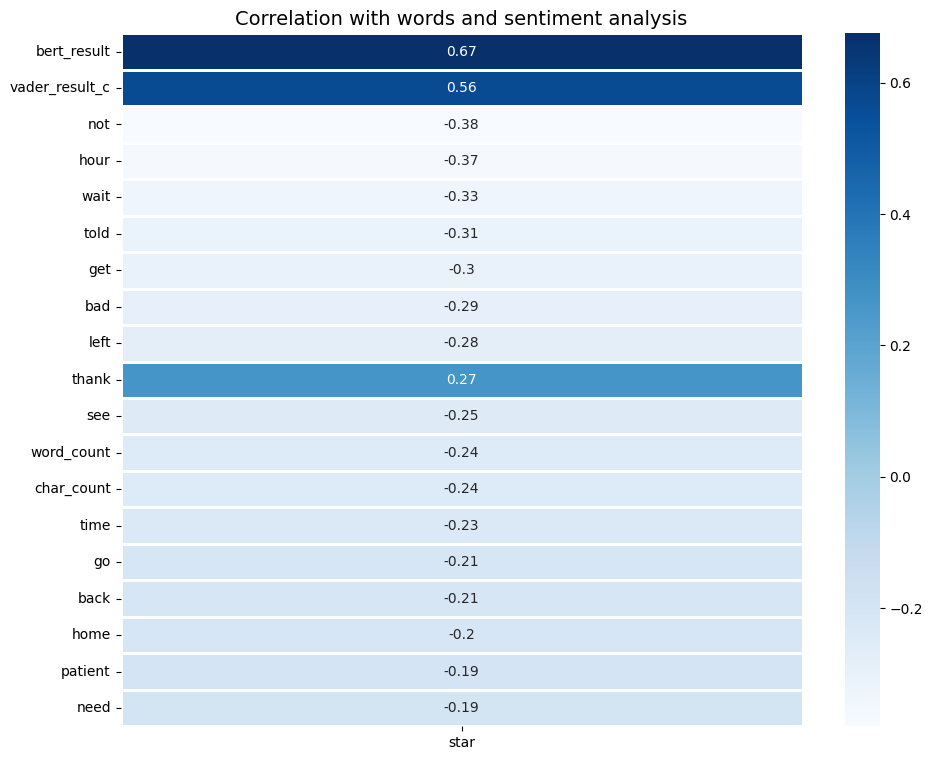

In [15]:
corr=review_corr_df.corr(method='spearman')[['star']].sort_values(by='star', ascending=False, key=abs)[1:20]
plt.figure(figsize =(11,9))
sns.heatmap(corr, linewidths=2, cmap='Blues', annot=True)
plt.title("Correlation with words and sentiment analysis", fontsize=14)
plt.show();

### Positive Correlation with review ratings

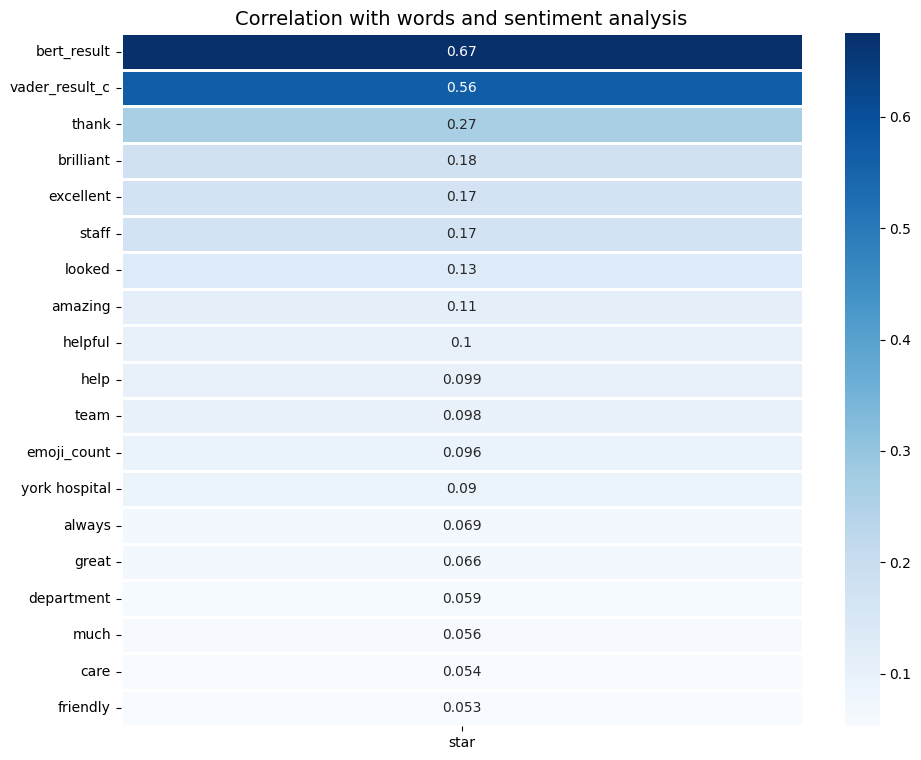

In [16]:
corr=review_corr_df.corr(method='spearman')[['star']].sort_values(by='star', ascending=False)[1:20]
plt.figure(figsize =(11,9))
sns.heatmap(corr, linewidths=2, cmap='Blues', annot=True)
plt.title("Correlation with words and sentiment analysis", fontsize=14)
plt.show();

### Negative Correlation with review ratings

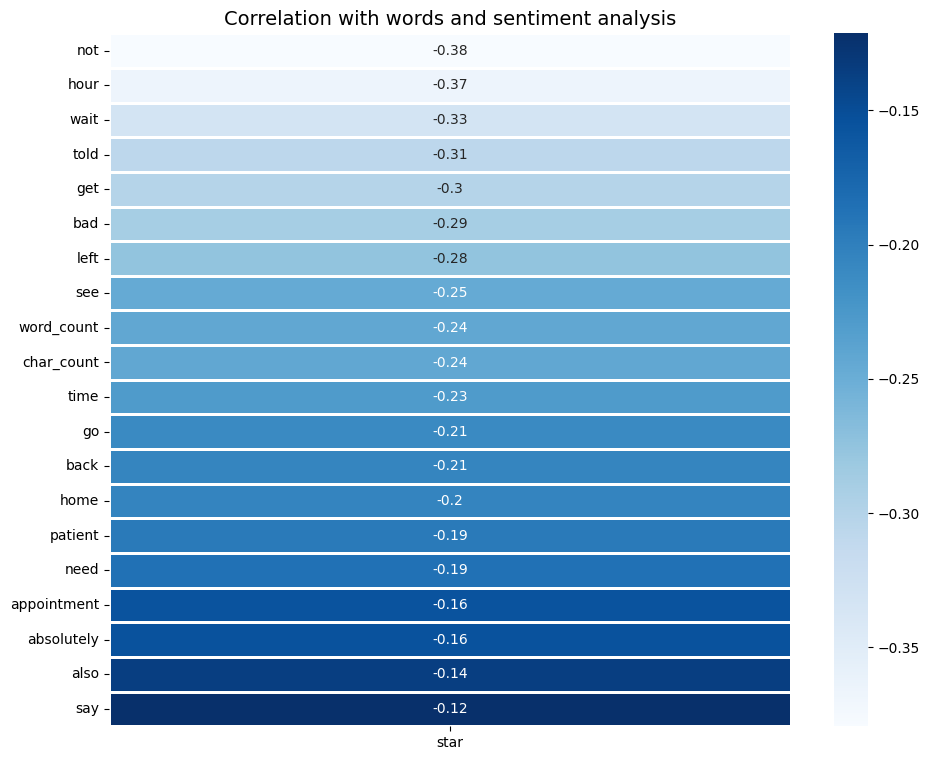

In [17]:
corr=review_corr_df.corr(method='spearman')[['star']].sort_values(by='star', ascending=True)[0:20]
plt.figure(figsize =(11,9))
sns.heatmap(corr, linewidths=2, cmap='Blues', annot=True)
plt.title("Correlation with words and sentiment analysis", fontsize=14)
plt.show();